In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

---

#### Загружаем датасет. Определяем матрицу признаков X и векторный массив классов видов цветков y

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

#### Разделяем данные на 30% тестовые и 70% обучающие

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [4]:
print(
    f'Количество меток в y: {np.bincount(y)}\n'
    f'Количество меток в y_train: {np.bincount(y_train)}\n'
    f'Количество меток в y_test: {np.bincount(y_test)}\n'
)

Количество меток в y: [50 50 50]
Количество меток в y_train: [35 35 35]
Количество меток в y_test: [15 15 15]



#### Визуализируем данные для обучения

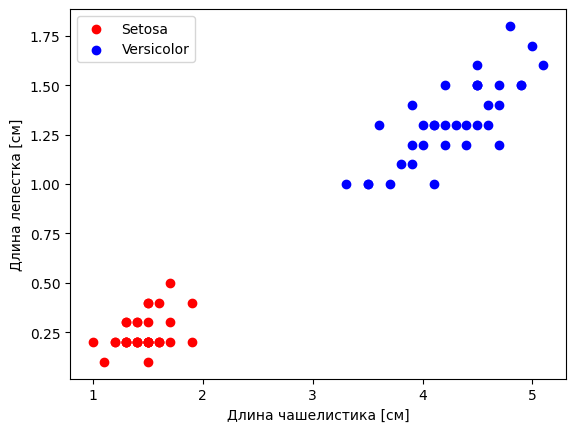

In [5]:
plt.scatter(
    X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
    color='red', marker='o', label='Setosa'
)

plt.scatter(
    X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
    color='blue', marker='o', label='Versicolor'
)

plt.xlabel('Длина чашелистика [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

---

#### Стандартизируем признаки

``` z = (x - μ) / σ ```

**Где:**
- \( x \) — значение наблюдения, для которого вычисляется Z-оценка,
- \( μ \) — среднее значение выборки,
- \( σ \) — стандартное отклонение выборки.
ти).

In [6]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

---

#### Функция визуализации области решений

In [7]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Настройка генератора меток и цветовой карты
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Строим поверхность решений
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # Прогнозируем классы для всех точек на сетке
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # Отображаем области решения
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Отображаем точки данных
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # Если есть индексы тестовых данных, отображаем их
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

#### Объединяем тренировочные и тестовые данные 

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
X_combined = np.vstack((X_train, X_test))